# 20BCE057
## DEVASY PATEL
## Practical 10
## Aim: Write program to find boundary of shapes

In [1]:
import cv2
import numpy as np

coloredimg = cv2.imread('applelogo.png')
img = cv2.cvtColor(coloredimg, cv2.COLOR_BGR2GRAY)


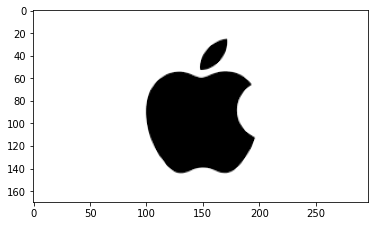

In [2]:
import matplotlib.pyplot as plt
plt.imshow(img, cmap='gray')

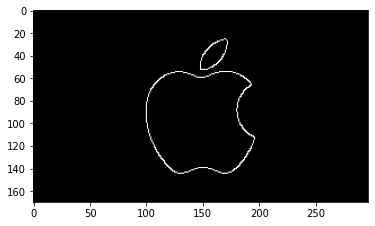

In [3]:
edges = cv2.Canny(img, 150, 250)
plt.imshow(edges, cmap='gray')

boundary_arr:  [(25, 169), (25, 170), (26, 171), (27, 172), (28, 172), (29, 172), (30, 172), (31, 171), (32, 171), (33, 171), (34, 171), (35, 170), (36, 170), (37, 170), (38, 169), (39, 169), (39, 168), (40, 168), (41, 168), (41, 167), (42, 167), (43, 167), (43, 166), (44, 166), (44, 165), (45, 165), (45, 164), (46, 164), (46, 163), (47, 163), (47, 162), (48, 162), (48, 161), (48, 160), (49, 160), (49, 159), (50, 159), (50, 158), (50, 157), (51, 156), (51, 155), (52, 154), (52, 153), (52, 152), (52, 151), (52, 150), (52, 149), (52, 148), (51, 148), (50, 148), (49, 148), (48, 148), (47, 148), (46, 148), (45, 148), (44, 149), (43, 149), (42, 149), (41, 150), (40, 150), (39, 150), (39, 151), (38, 151), (38, 152), (37, 152), (36, 152), (36, 153), (35, 153), (35, 154), (34, 154), (34, 155), (33, 155), (33, 156), (32, 156), (32, 157), (31, 157), (31, 158), (30, 158), (30, 159), (29, 159), (29, 160), (29, 161), (28, 161), (28, 162), (28, 163), (27, 163), (27, 164), (27, 165), (26, 166), (26, 

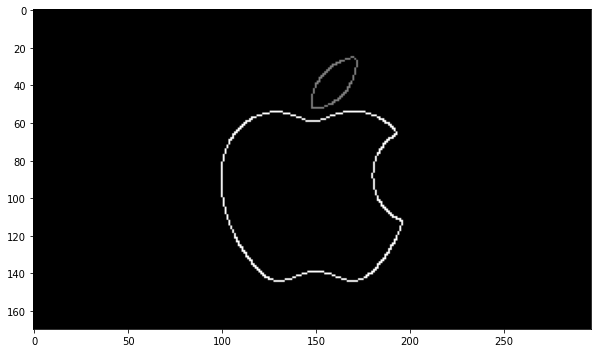

In [4]:
# define a bfs function to find the connected components
def dfs(img, x, y, label, eight = False, boundary_arr=[]):
    if img[x, y] == 255:
        boundary_arr.append((x, y))
        img[x, y] = label
        # check the 4 neighbors
        if x > 0:
            dfs(img, x-1, y, label, boundary_arr)
        if x < img.shape[0]-1:
            dfs(img, x+1, y, label, boundary_arr)
        if y > 0:
            dfs(img, x, y-1, label, boundary_arr)
        if y < img.shape[1]-1:
            dfs(img, x, y+1, label, boundary_arr)
        if(eight):
            # check the 4 neighbors
            if x > 0 and y > 0:
                dfs(img, x-1, y-1, label, boundary_arr)
            if x < img.shape[0]-1 and y > 0:
                dfs(img, x+1, y-1, label, boundary_arr)
            if x > 0 and y < img.shape[1]-1:
                dfs(img, x-1, y+1, label, boundary_arr)
            if x < img.shape[0]-1 and y < img.shape[1]-1:
                dfs(img, x+1, y+1, label, boundary_arr)
    return img, boundary_arr


# find the connected components
label = 1
for x in range(img.shape[0]):
    for y in range(img.shape[1]):
        if edges[x, y] == 255:
            edges, boundary_arr = dfs(edges, x, y, label, True)
            label += 1
            
# show the result
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(edges, cmap='gray')
# plt.imshow(img, cmap='gray')

# print("boundary_arr: ", boundary_arr)

In [5]:
boundary_arr = np.array(boundary_arr)
print(boundary_arr.shape)

(459, 2)


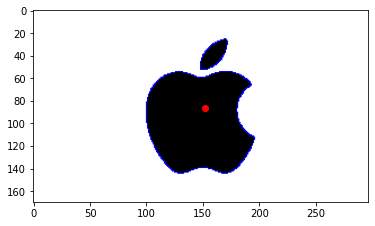

In [10]:
for x, y in boundary_arr:
    coloredimg[x, y] = (0, 0, 255)
    
x = np.mean(boundary_arr[:, 0])
y = np.mean(boundary_arr[:, 1])
x = int(x)
y = int(y)

plt.imshow(coloredimg)
plt.scatter(y, x, color='red')

In [7]:
# find centroid of the boundary_arr

x = np.mean(boundary_arr[:, 0])
y = np.mean(boundary_arr[:, 1])

print(x, y)

86.3442265795207 152.05228758169935


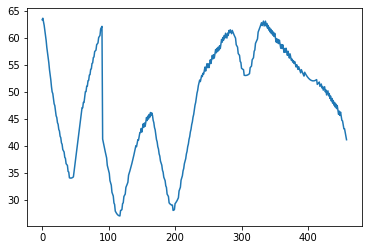

In [8]:
# round the centroid
x = int(x)
y = int(y)

# plot distance from centroid from every point in boundary_arr
dist_arr = []
for x1, y1 in boundary_arr:
    dist_arr.append(np.sqrt((x1-x)**2 + (y1-y)**2))
    
dist_arr = np.array(dist_arr)
plt.plot(dist_arr)